### 목표
 - 타이타닉 데이터를 학습해서 생존자와 사망자를 예측해보자!
 - 머신러닝 전체 과정을 스스로 진행해보자!

In [341]:
# train -> train.csv , test -> test.csv 로드해서 데이터의 구조먼저 파악
# PassengerId 를 인덱스로 설정해서 csv파일을 불러오세요
# 배웠던 모든 것을 활용해보자!

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [343]:
train = pd.read_csv("data/train.csv", index_col='PassengerId')
test = pd.read_csv("data/test.csv", index_col='PassengerId')

In [344]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [345]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [347]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Age컬럼의 결측치를 채워보자!
- 다른 컬럼들과의 상관관계를 이용해 결측치를 채우기!

In [348]:
# 상관관계 : 각 특성들간 영향도를 파악 할 수 있음(범위 : -1(반비례) ~ 1(비례))
# 절대값이 클수록 영향도가 높아짐
train.corr()  # 수치형 데이터만 출력이 됨

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [349]:
# 생존에 관련이 많을 것 같은 성별을 함께 그룹핑에 활용 해보기!(피벗 테이블 활용)

In [350]:
# train 데이터에 있는 값들로 피벗테이블을 만들어보자!
# 피벗 테이블 : 테이블의 요약된 정보를 출력할 수 있는 테이블 형태
pt1 = train.pivot_table(values='Age',             # 데이터로 사용될 열을 지정
                        index=['Pclass', 'Sex'],  # 멀티인덱스 설정(Pclass 나눈 후 Sex 나눠줌)
                        # 데이터를 요약시 사용하는 함수를 지정(mean : 평균, sum : 합계, count:개수)
                        aggfunc='mean'            
                        )  
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [351]:
# 멀티인덱스 슬라이싱
pt1.loc[1, 'female']

Age    34.611765
Name: (1, female), dtype: float64

In [352]:
def fill_age(row) :
    # 만약 Age가 결측치라면 피벗테이블에서 값을 가져오고
    if np.isnan(row['Age']):     # Age 열이 Null값이라면(np.isnan)
        return pt1.loc[row['Pclass'], row['Sex']]
    # Age가 결측치가 아니라면 원래 나이값을 그대로 사용하자!
    else :
        return row['Age']        # 원래 Age 열에 있는 값을 사용!

In [353]:
# apply : 데이터프레임에서 행 또는 열에 한번에 복잡한 계산을 하고 싶을때 사용
train['Age'] = train.apply(fill_age, axis=1).astype('int64') 
# astype : 데이터의 타입을 변경해 줌

In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [355]:
test['Age'] = test.apply(fill_age, axis=1).astype('int64') 

In [356]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Embarked 채우기

In [357]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [358]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

- train데이터의 Embarked는 결측치가 2개 밖에 없네!

In [359]:
train['Embarked'] = train['Embarked'].fillna('S')

In [360]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Fare 채우기

In [361]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [362]:
pt2 = train.pivot_table(values='Fare',            
                        index=['Pclass', 'Sex'],  
                        aggfunc='mean'            
                        )  
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [363]:
# 불리언 인덱싱을 활용하여 Null값인 행을 찾아보자!
# (true, false로 판단할 수 있는 조건으로만 설정)
# isnull : Null값이 있으면 true, 없으면 false
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [364]:
test['Fare'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Fare, Length: 418, dtype: bool

In [365]:
test['Fare'] = test['Fare'].fillna(12.661633)

In [366]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 채우기

In [367]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [368]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C82            1
E77            1
D9             1
B38            1
C99            1
Name: Cabin, Length: 147, dtype: int64

In [369]:
# train 과 test 데이터의 결측치를 임의의 문자 M으로 채우면서
# 새로운 열인 Deck를 생성해보자!
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [370]:
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [371]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [372]:
# train, test 데이터에서 기존에 있던 Cabin 컬럼을 지워보자!

# drop : 행과 열 모두를 삭제 할 수 있음
# del : 열만 삭제 가능
train.drop('Cabin', inplace=True, axis=1)
test.drop('Cabin', inplace=True, axis=1)

# inplace=True : 변경된 값을 변수에 그대로 저장!

# del train['Cabin']
# del test['Cabin']

In [373]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [374]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Deck 시각화

In [375]:
# .groupby : 그룹별로 데이터를 집계, 요약 해보자!
train_deck = train[['Deck', 'Survived', 'Name']].groupby(['Deck', 'Survived']).count()
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [376]:
# seaborn : 시각화 라이브러리
# -> matplotlib에 비해서 색상이 좀더 깔끔하고 그래프를 그리는 기본 기능이 좋다
# -> pandas 호환성도 좋다

import seaborn as sns

<AxesSubplot:xlabel='Deck', ylabel='count'>

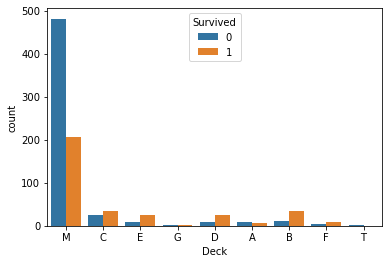

In [377]:
# countplot : 데이터의 개수를 출력해주는 차트
sns.countplot(data=train,
              x='Deck',
              # hue : 해당 컬럼의 unique값들이 들어가서 출력됨
              # unique 값에 대한 각각의 bar차트가 표시되고 범례도 표시됨
              hue='Survived'   
              )

- M(결측치가 있는 데이터)에서 상대적으로 사람들이 많이 죽었네!
- 생존여부를 판단하는데 활용해도 괜찮겠네!

### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

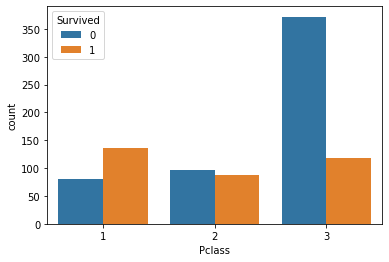

In [378]:
sns.countplot(data=train,
              x='Pclass',
              hue='Survived'   
              )

- Pclass가 3이면 많이 가는구나!

### Deck과 Pclass를 시각화

<AxesSubplot:xlabel='Deck', ylabel='count'>

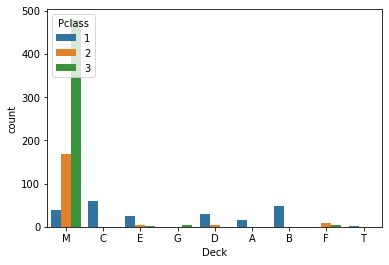

In [379]:
# Deck, Pclass의 관계를 시각화
sns.countplot(data=train,
              x='Deck',
              hue='Pclass'   
              )

- Sex, Embarked를 시각화 해보자!

<AxesSubplot:xlabel='Sex', ylabel='count'>

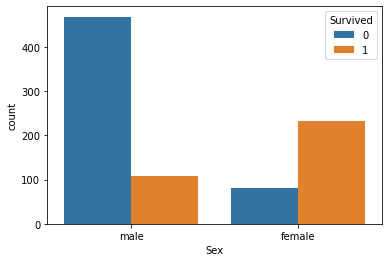

In [380]:
sns.countplot(data=train,
              x='Sex',
              hue='Survived'   
              )

- 아.. 남자가 많이 갔구나!

<AxesSubplot:xlabel='Embarked', ylabel='count'>

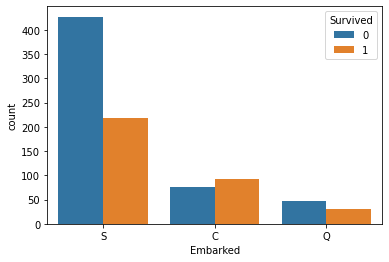

In [381]:
sns.countplot(data=train,
              x='Embarked',
              hue='Survived'   
              )

- 탑승항구가 S인 곳에서 탑승한 사람들이 많았고 사망자 수치도 높았음!

<AxesSubplot:xlabel='Embarked', ylabel='count'>

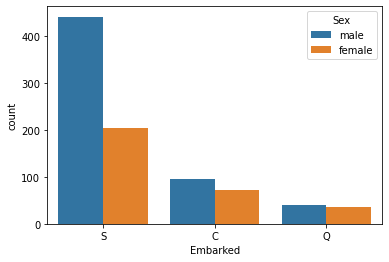

In [382]:
sns.countplot(data=train,
              x='Embarked',
              hue='Sex'   
              )

- S 항에서 가장 많은 사람들이 탔고 남자가 많았네!

# Age 시각화

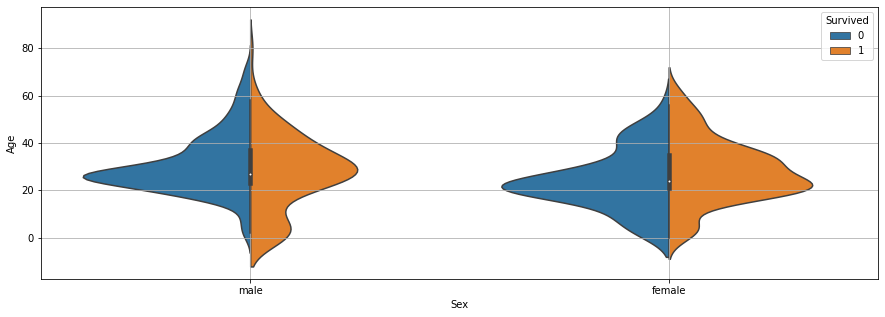

In [383]:
plt.figure(figsize = (15,5))

# 바이올린 형태로 데이터를 시각화 해주는 기능
sns.violinplot(data=train,
               x='Sex',
               y='Age',
               hue='Survived',
                split=True  # True일 경우 두 그룹을 하나의 바이올린 형태로
                )
plt.grid()

- 20~30대 탑승자가 많았고 사망자도 많았네
- 20대 미만의 어린아이 중에서는 남자가 여자에 비해서 많이 살았네

# Fare 시각화

In [384]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

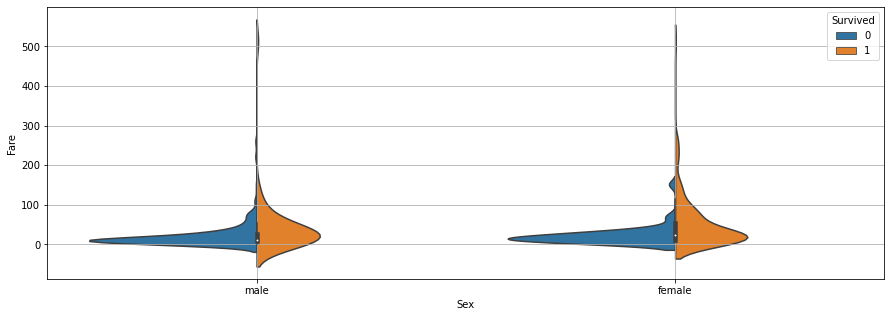

In [385]:
plt.figure(figsize = (15,5))

# 바이올린 형태로 데이터를 시각화 해주는 기능
sns.violinplot(data=train,
               x='Sex',
               y='Fare',
               hue='Survived',
                split=True  # True일 경우 두 그룹을 하나의 바이올린 형태로
                )
plt.grid()

- 요금이 저렴한 사람은 상대적으로 많이 가버렸네

# Parch - 함께 탑승한 부모자식의 수

# Sibsp - 함께 탑승한 형제자매, 배우자의 수

- Parch와 Sibsp를 더해서 가족의 숫자라는 새로운 컬럼을 생성해보자
- train과 test 모두에 작업을 해보자

In [386]:
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1 # 1인 가족
test['Family_Size'] = test['Parch'] + test['SibSp'] # 1인 가족

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

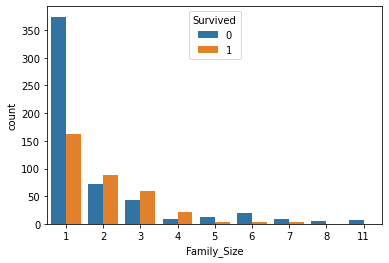

In [387]:
sns.countplot(data=train,
               x='Family_Size',
               hue='Survived',
                )

- 1명일때 죽은 비율이 높고 2-4명 일때는 산비율이 높고 5 명이상이면 죽은 비율이 높네  

- 가족 사이즈가 1이면 Alone, 2-4이면 Small, 5이상이면 Large

In [388]:
bins = [0, 1, 4, 11] # 범주값
labels = ['Alone', 'Small', 'Large'] # Alone 0-1 / Small 1-4 / Large 4-11

train['Family_Group'] = pd.cut(train['Family_Size'], bins=bins, labels=labels)
test['Family_Group'] = pd.cut(train['Family_Size'], bins=bins, labels=labels)

In [389]:
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [390]:
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

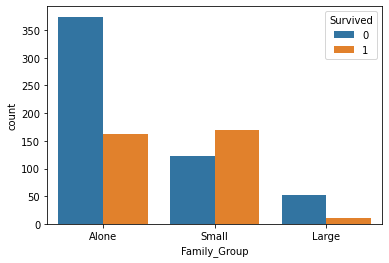

In [391]:
sns.countplot(data=train,
               x='Family_Group',
               hue='Survived',
                )

# Text data 다루기
- 이름의 호칭만

In [392]:
def split_title(row) :
    return row.split(',')[1].split('.')[0].strip()

In [393]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [394]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
the Countess      1
Lady              1
Don               1
Mme               1
Jonkheer          1
Ms                1
Sir               1
Name: Title, dtype: int64

In [395]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

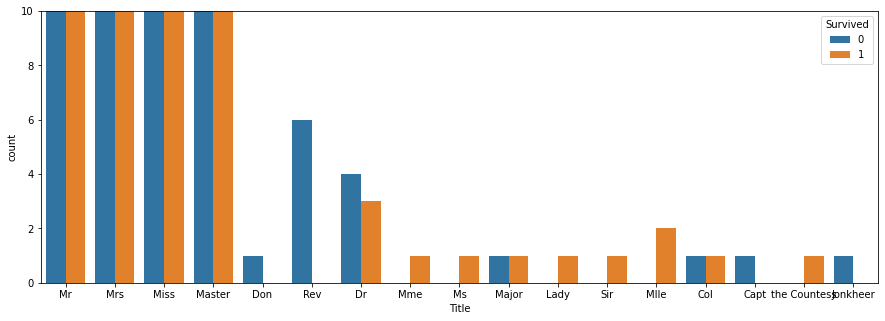

In [396]:
plt.figure(figsize=(15,5))
plt.ylim(0,10) # y축 크기 설정
sns.countplot(data = train,
             x='Title',
             hue='Survived'
             )

<AxesSubplot:xlabel='Title', ylabel='count'>

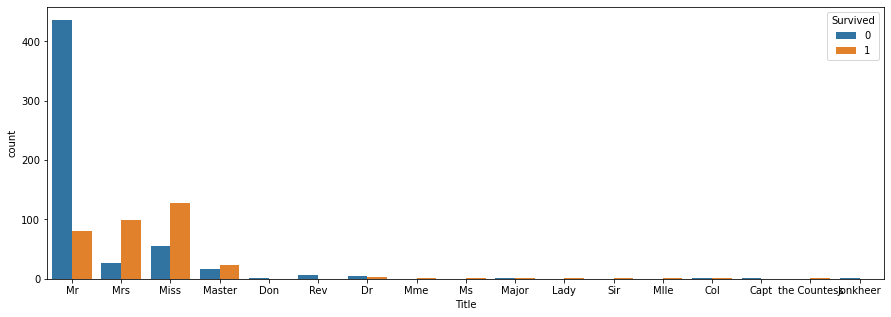

In [397]:
plt.figure(figsize=(15,5))
sns.countplot(data = train,
             x='Title',
             hue='Survived'
             )

In [398]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [399]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

- 개수가 작은 호칭들을 Other로 묶어주자

In [400]:
# train['Title'] 컬럼의 unique 값들을 그대로 복사해서 title이라는 변수에 담아주기!
# Don과 Rev의 순서를 바꿔주기!
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [401]:
len(title)

17

In [402]:
# 중요한 호칭들만 그대로 사용하고 나머지는 Other로 변환하여 리스트로 저장!
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other']*12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [403]:
# zip 함수를 사용하여 리스트 형태인 title과 convert_title을 차례대로
# key 값, value 값으로 만드는 딕셔너리 생성

In [404]:
title_dict = dict(zip(title,convert_title))

title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [405]:
# 데이터 명 (딕셔너리 key값 -> 딕셔너리 value값)
train['Title'] = train['Title'].map(title_dict)
#map : 시리즈 형태에만 적용됨
#applymap: DF 형태

In [406]:
train['Title']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [407]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [408]:
test['Title'].unique() # Dona가 없네

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [409]:
title_dict['Dona'] = 'Other'

title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [410]:
test['Title'] = test['Title'].map(title_dict)

In [411]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [412]:
test['Title']

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306     Other
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

# Ticket, Name 컬럼 삭제하기

In [413]:
test['Ticket']

PassengerId
892                 330911
893                 363272
894                 240276
895                 315154
896                3101298
               ...        
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: Ticket, Length: 418, dtype: object

In [414]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [415]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [416]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 124.5+ KB


- 문제와 정답 데이터로 분리

In [417]:
y_train = train["Survived"]
X_train = train.drop('Survived', axis=1)
X_test = test

In [418]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [419]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'Family_Size', 'Family_Group', 'Title'],
      dtype='object')

In [420]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'Family_Size', 'Family_Group', 'Title'],
      dtype='object')

In [421]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,
892,3,male,34,0,0,7.8292,Q,M,0,NaN,Mr
893,3,female,47,1,0,7.0000,S,M,1,NaN,Mrs
894,2,male,62,0,0,9.6875,Q,M,0,NaN,Mr
895,3,male,27,0,0,8.6625,S,M,0,NaN,Mr
896,3,female,22,1,1,12.2875,S,M,2,NaN,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,26,0,0,8.0500,S,M,0,NaN,Mr
1306,1,female,39,0,0,108.9000,C,C,0,NaN,Other
1307,3,male,38,0,0,7.2500,S,M,0,NaN,Mr


- 문자형 데이터 인코딩

In [422]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 124.5+ KB


In [423]:
str_feature = ['Sex', 'Embarked', 'Deck', 'Family_Group', 'Title']

In [424]:
tmp = pd.get_dummies(train['Sex'], prefix = 'Sex') # prefix: 직관적으로 보게 표시
tmp

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [425]:
for i in str_feature :
    # 원핫 인코딩후 결과를 dummy 변수에 담아줌
    dummy = pd.get_dummies(train[i], prefix = i)
    # X_train에 dummy를 합쳐줌
    X_train = pd.concat([X_train, dummy], axis = 1)
    # X_train에서 기존 컬럼을 삭제
    X_train.drop(i, axis=1, inplace = True)

In [426]:
for i in str_feature :
    dummy = pd.get_dummies(test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [427]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 28)


- 인코딩 후 train과 test 데이터의 컬럼개수가 차이가 나게 됌

In [429]:
# set : 중복이 없는 요소들로만 구성된 집합
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [430]:
X_test['Deck_T'] = 0

In [431]:
# 모델링을 위한 데이터 가공이 끝남
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 29)


# 모델링(선택, 학습)

In [432]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

# Tree 모델

In [433]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [435]:
result = cross_val_score(tree_model,
                         X_train,
                         y_train,
                         cv = 5
                        )

result

array([0.79888268, 0.80337079, 0.8258427 , 0.76966292, 0.85393258])

In [436]:
result.mean()

0.8103383340656583

# KNN 모델

In [441]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [444]:
result = cross_val_score(knn_model,
                         X_train,
                         y_train,
                         cv = 5
                        )

result

array([0.72067039, 0.69101124, 0.74157303, 0.75842697, 0.73595506])

In [445]:
result.mean()

0.7295273366392567

KNN Scaler 적용

In [447]:
from sklearn.preprocessing import StandardScaler

In [448]:
scaler = StandardScaler()

In [449]:
scaler.fit(X_train)

StandardScaler()

In [450]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[ 0.82737724, -0.5404969 ,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693,  0.66195688,  0.43279337, ...,  2.47547975,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724, -0.61565027,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  0.21103671, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [451]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.82737724,  0.36134344, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  1.33833714,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-0.36936484,  2.46563756, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724,  0.66195688, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [452]:
result2 = cross_val_score(knn_model,
                         transform_X_train,
                         y_train,
                         cv = 5
                        )

result2.mean()

0.7901136149645346

### Kaggle 제출용 파일을 만들어보자!

In [457]:
result = pd.read_csv('data/gender_submission.csv')
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [461]:
# 여러분들 변수명에 맞춰주셔야 합니다~!
knn_model.fit(transform_X_train, y_train)  # 모델 학습
pre = knn_model.predict(X_test)  # 모델로 예측

In [462]:
# result 변수에 Survived 라는 열을 추가(추가는 예측한 결과 값인 pre를 넣어줌)
result['Survived'] = pre

In [463]:
# csv 파일로 저장 후 내보내기
# 파일은 현재 주피터 노트북과 같은 폴더에 만들어짐
result.to_csv('submission.csv', index=False)